## Pandas time series
- A series or dataframe using a detetime index insted of range index.
- Used for storing events/data that fits on a timeline
    - Weather data
    - Temperature reading
    - heart rate monitoring
    - quarterly sales
    - stock prices
- [lecture 1](https://ithogskolan.sharepoint.com/:v:/s/AI23/EYFECuzgW5lNj90CgA_LEmAB2wmZ1rBBz723EsLYZVpHrQ?e=Y1pmWX)
    

In [14]:
import pandas as pd
import numpy as np

### Creating a datetimeindex
Use date_range() with 3 of 4 parameters:
- start
- end
- priods
- frequency
start och end måste med, samt en av periods och freq

In [15]:
datetimeindex = pd.date_range(start='2018-01-01', end='2018-02-10', periods=10)
#datetimeindex
#type(datetimeindex)

Datetime index kan användas i en Pandas Dataframe

### Resampling
Is the practice of creating new samples with a lower or higher frequncy than the original data.

#### Downsampling
- When the sampling frequency is lower than the original we can aggregate values from the original data.

In [16]:
df.resample()

NameError: name 'df' is not defined

#### Upsampling
- when the sample frequency is higher than the original, we can fill between values.

### Working on real data

In [25]:
apple = pd.read_csv("../Data/HistoricalData_Apple.csv", parse_dates=['Date'], index_col='Date') # gör om Date till datetime vid inläsning
apple.rename(columns={'Close/Last':'Close'}, inplace=True)
apple.head()

,Close,Volume,Open,High,Low
Date,,,,,
2023-11-09,$182.41,53763540,$182.96,$184.12,$181.81
2023-11-08,$182.89,49340280,$182.35,$183.45,$181.59
2023-11-07,$181.82,70529970,$179.18,$182.44,$178.97
2023-11-06,$179.23,63841310,$176.38,$179.43,$176.21
2023-11-03,$176.65,79829250,$174.24,$176.82,$173.35


In [26]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2023-11-09 to 2013-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2517 non-null   object
 1   Volume  2517 non-null   int64 
 2   Open    2517 non-null   object
 3   High    2517 non-null   object
 4   Low     2517 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [31]:
apple[['Close','Open','High','Low']] = apple[['Close','Open','High','Low']].map(lambda value: value.replace('$', '')) # map kör en funktion på varje cell (apply kör på alla, Fredrik förklarar i föreläsningen)
apple

,Close,Volume,Open,High,Low
Date,,,,,
2023-11-09,182.41,53763540,182.96,184.12,181.81
2023-11-08,182.89,49340280,182.35,183.45,181.59
2023-11-07,181.82,70529970,179.18,182.44,178.97
2023-11-06,179.23,63841310,176.38,179.43,176.21
2023-11-03,176.65,79829250,174.24,176.82,173.35
...,...,...,...,...,...
2013-11-15,18.7497,317359713,18.8064,18.8961,18.7318
2013-11-14,18.8629,281606247,18.6718,18.9029,18.6382
2013-11-13,18.5941,196615949,18.50,18.6518,18.4629


In [32]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2023-11-09 to 2013-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2517 non-null   object
 1   Volume  2517 non-null   int64 
 2   Open    2517 non-null   object
 3   High    2517 non-null   object
 4   Low     2517 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [36]:
# till floats
to_float_cols = ['Close','Open','High','Low']
apple = apple.astype({col : "float64" for col in to_float_cols})
apple.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2023-11-09 to 2013-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2517 non-null   float64
 1   Volume  2517 non-null   int64  
 2   Open    2517 non-null   float64
 3   High    2517 non-null   float64
 4   Low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


In [39]:
apple.sort_index(inplace=True)

In [40]:
apple.loc['2017-04']

,Close,Volume,Open,High,Low
Date,,,,,
2017-04-03,35.9250,79880160,35.9275,36.0300,35.7625
2017-04-04,36.1925,79461200,35.8125,36.2225,35.7925
2017-04-05,36.0050,110598000,36.0550,36.3650,35.9525
2017-04-06,35.9150,84524160,36.0725,36.1300,35.8625
2017-04-07,35.8350,66634640,35.9325,36.0450,35.8175
2017-04-10,35.7925,75618720,35.9000,35.9698,35.7250
2017-04-11,35.4075,121366080,35.7350,35.8375,35.0150
2017-04-12,35.4500,81281680,35.4000,35.5375,35.2525
2017-04-13,35.2625,71102040,35.4775,35.5950,35.2625


In [41]:
# högsta priset under 2018
apple.loc['2018','High'].max()

58.3675

In [42]:
apple.resample("YS").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-01-01,19.509140,3.059521e+08,19.499974,19.651411,19.375683
2014-01-01,23.066148,2.516821e+08,23.054946,23.253159,22.871088
2015-01-01,30.009965,2.065851e+08,30.042381,30.310365,29.715737
2016-01-01,26.151002,1.530707e+08,26.126925,26.356766,25.922553
2017-01-01,37.637764,1.080108e+08,37.612713,37.851502,37.371890
2018-01-01,47.263357,1.350735e+08,47.276384,47.748514,46.795855
2019-01-01,52.063983,1.122429e+08,51.967270,52.457905,51.568252
2020-01-01,95.346759,1.576214e+08,95.267638,96.661719,93.912504
2021-01-01,140.989325,9.054053e+07,140.861488,142.347679,139.473963


c:\Users\danie\Anaconda3\envs\databeh\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\Anaconda3\envs\databeh\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\Anaconda3\envs\databeh\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\Anaconda3\envs\databeh\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

<Axes: xlabel='Date', ylabel='Open'>

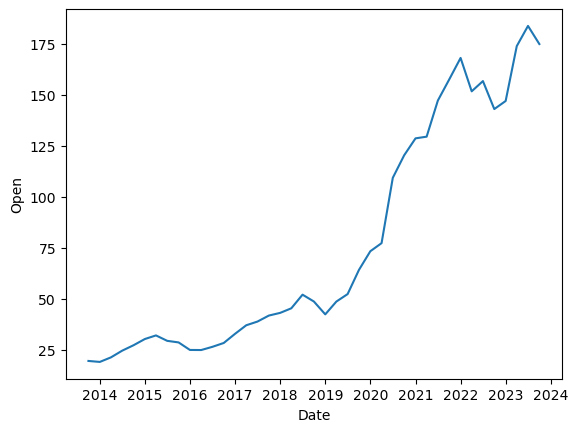

In [50]:
import seaborn as sns

data = apple.loc['2020']
data = apple.loc['2020'].resample("M").mean()
data = apple.resample("QS").mean()

sns.lineplot(data=data, x=data.index, y='Open')